In [1]:
# --- Setup ---
import os
import sys
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
from transformers import CLIPTokenizer, CLIPModel

# Add your src/ folder if needed (based on your repo structure)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from model import load_tokenizer, load_model
from utils import read_yaml, get_tokenizer_config, get_model_config

# Set device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")


Using device: cuda


In [3]:
# --- Load Configuration ---

# Path to your files
config_path = "./configs/clip_train_config.yaml"
checkpoint_path = "./TrainingLogs/checkpoint-584/pytorch_model.bin"

# Load yaml config
config = read_yaml(config_path)

# Load tokenizer
tokenizer_name, tokenizer_path, tokenizer_extra_config = get_tokenizer_config(config)
tokenizer = load_tokenizer(
    tokenizer_name=tokenizer_name,
    tokenizer_path=tokenizer_path,
    tokenizer_config=tokenizer_extra_config,
)

# Load model
model_name, model_path, model_extra_config, pretrained = get_model_config(config)
model = load_model(
    model_name=model_name,
    model_path=model_path,
    model_config=model_extra_config,
    pretrained=False,  # We'll manually load the checkpoint
)
model.load_state_dict(torch.load(checkpoint_path, map_location=DEVICE))
model = model.to(DEVICE)
model.eval()

print("Model and tokenizer loaded successfully.")

Model and tokenizer loaded successfully.


In [5]:
from transformers import AutoProcessor
import requests

In [6]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

In [50]:
url = "/home/hmankodi/Projects/PaperImplementations/CLIP/data/Images/3726168984_1fa2c8965b.jpg"
image = Image.open(url)

inputs = processor(
    text=[
        "road",
        "car",
        "Girls and Boys",
        "A man stands near a wall and smokes a cigarette ",
        "dogs",
    ],
    images=image,
    return_tensors="pt",
    padding=True,
).to(device=DEVICE)

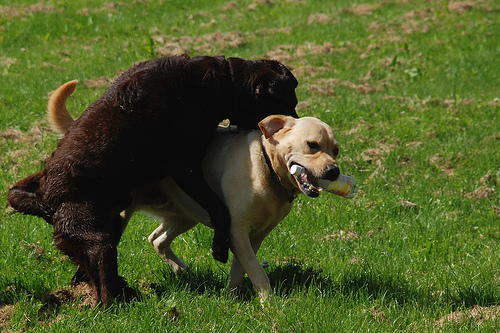

In [51]:
image

In [52]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [53]:
probs

tensor([[0.2220, 0.0371, 0.1475, 0.0789, 0.5145]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)